<a href="https://colab.research.google.com/github/Rajumenan/Detecting-market-trends/blob/main/SourceCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         Price              Close   High                Low  \
count      252                251    251                251   
unique     252                245    245                247   
top     Ticker  183.1300048828125  185.0  183.4499969482422   
freq         1                  2      2                  2   

                      Open    Volume company_name  
count                  251       251          250  
unique                 245       249            1  
top     180.10000610351562  41667300       AMAZON  
freq                     2         2          250  
Initial data shape: (252, 7)
        Price               Close                High                 Low  \
0      Ticker                AMZN                AMZN                AMZN   
1        Date                 NaN                 NaN                 NaN   
2  2024-05-08               188.0  188.42999267578125  186.38999938964844   
3  2024-05-09               189.5   191.6999969482422  187.44000244140625   
4  2024-05

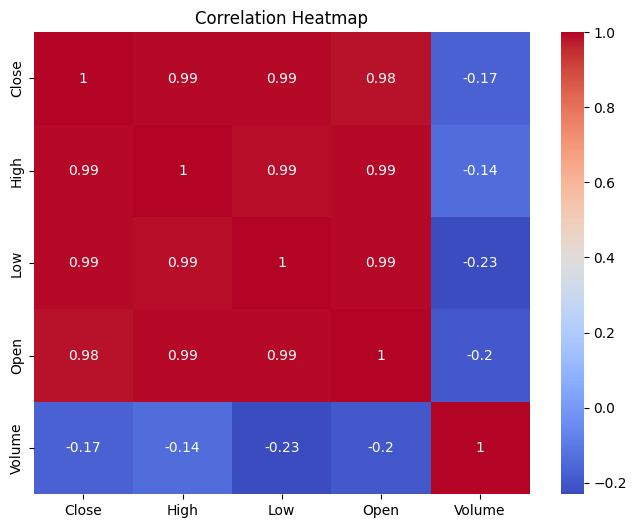

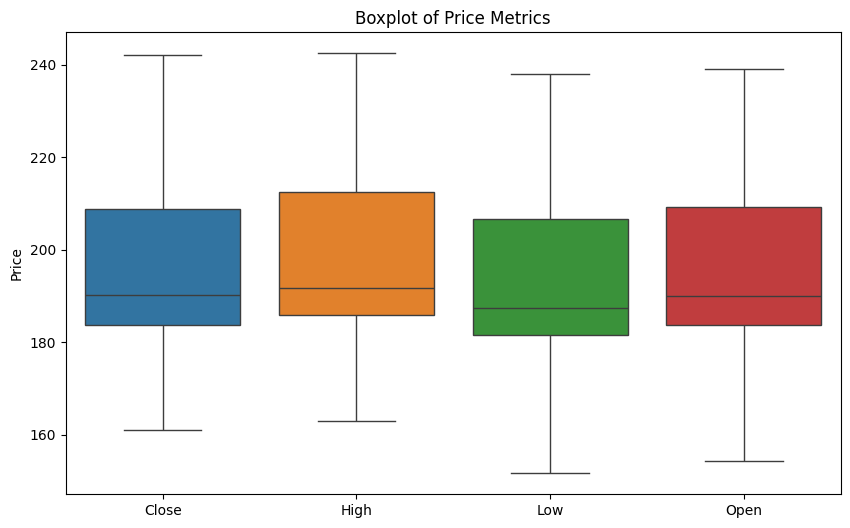

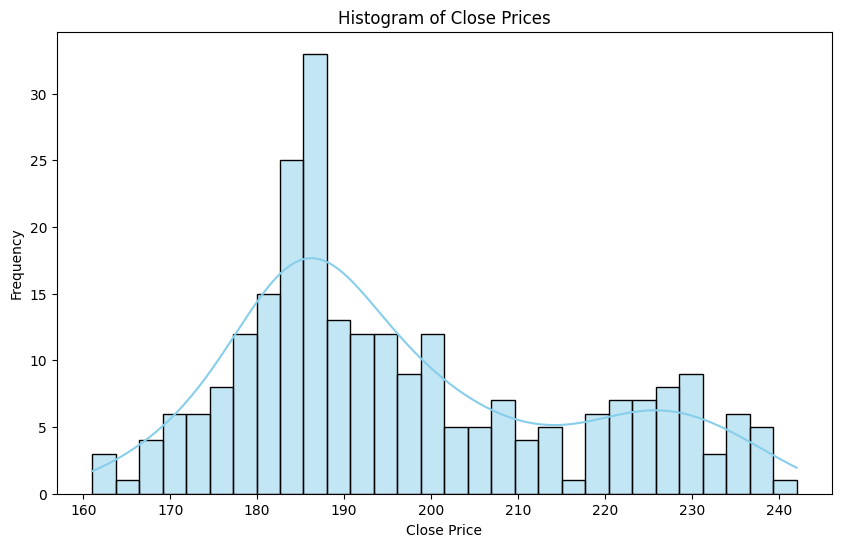

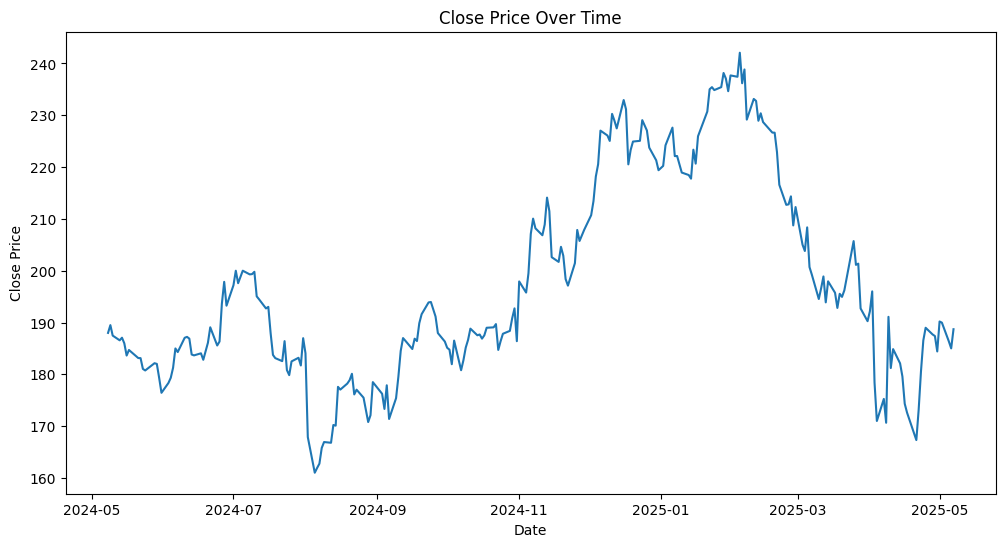

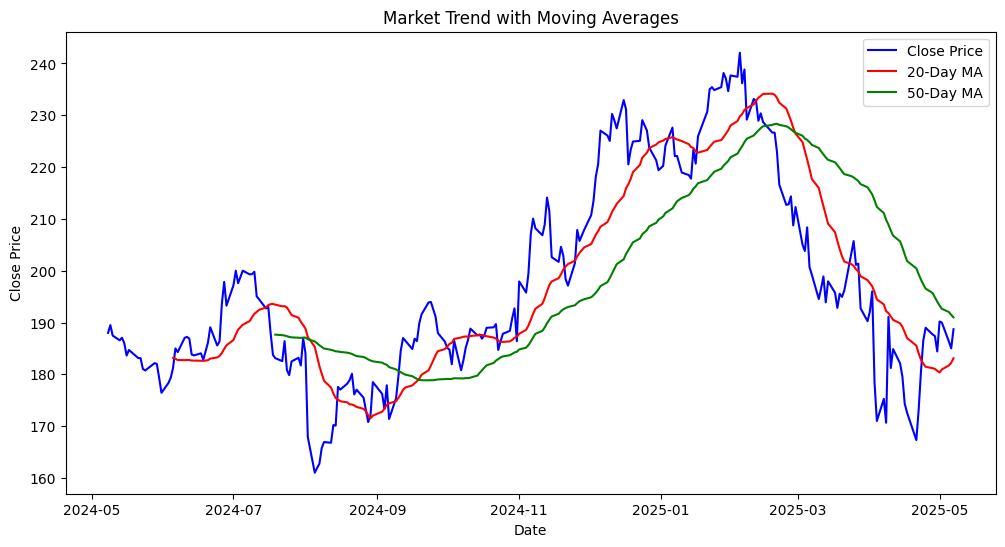

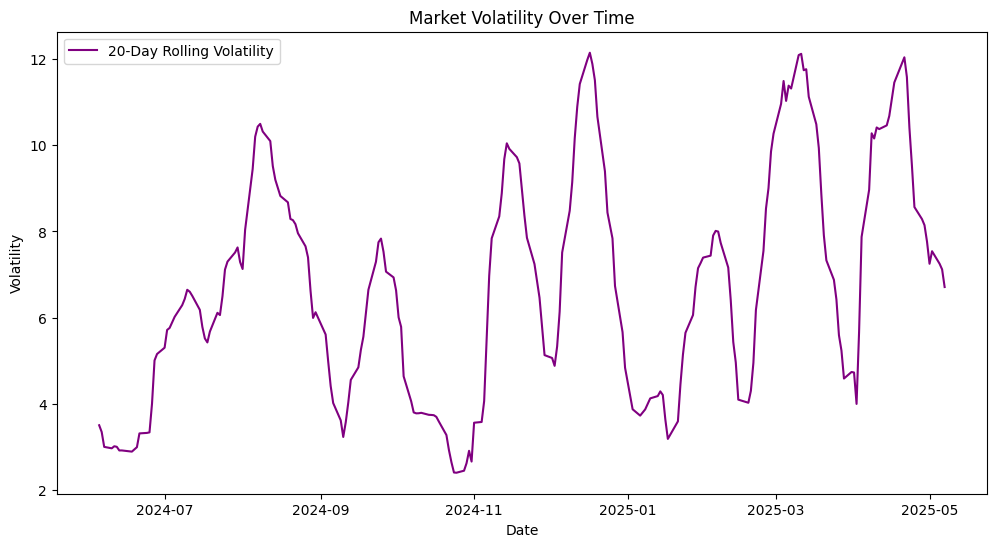


Trend Summary:
Trend
Bullish    121
Bearish     80
Neutral     49
Name: count, dtype: int64


<ipython-input-2-59a5292748b3>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Trend', data=df_cleaned, palette='Set2')


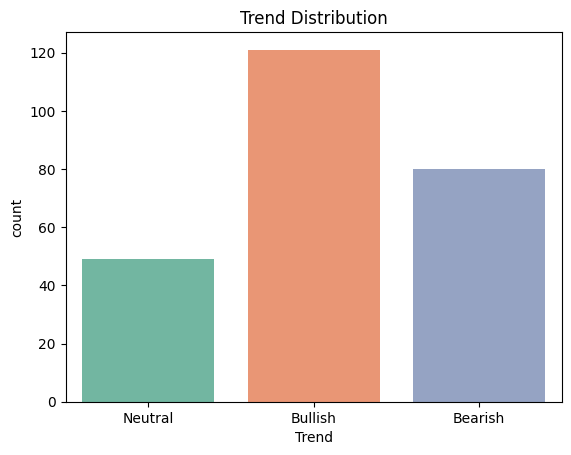

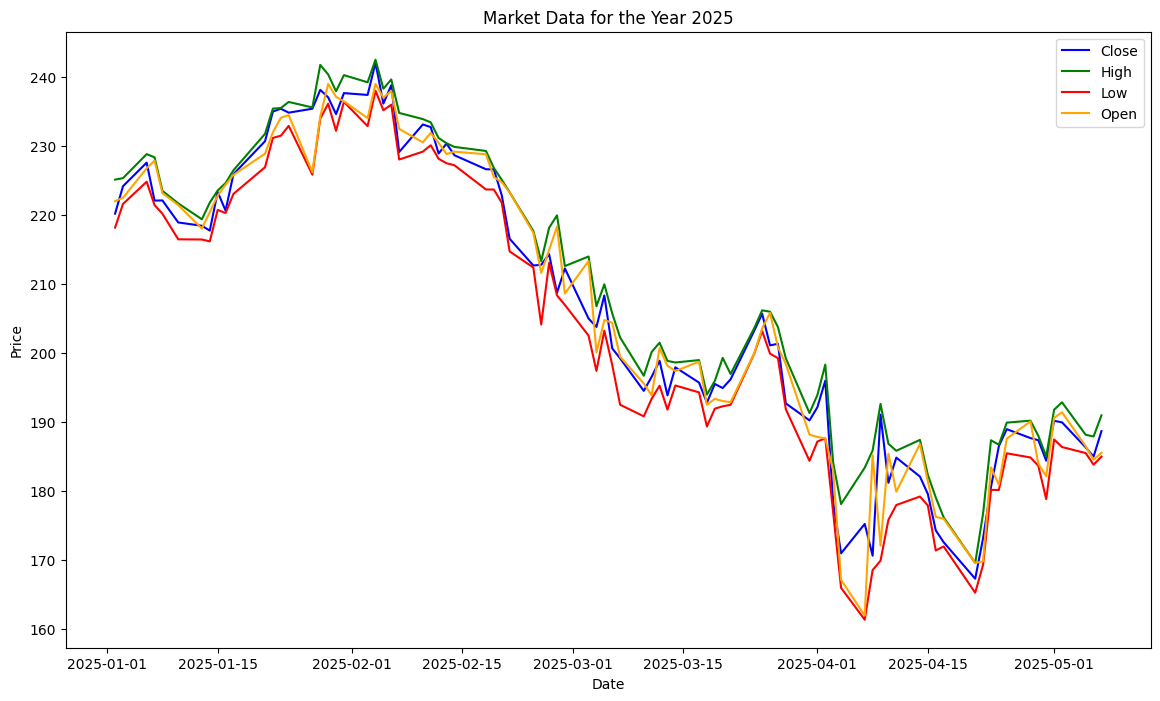


Analysis complete: The market trends have been detected and visualized using moving averages and volatility metrics. You can expand this by integrating financial report sentiment or additional economic indicators.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/marketdata.csv')

print(df.describe())

print("Initial data shape:", df.shape)
print(df.head())

df_cleaned = df.iloc[2:].reset_index(drop=True)

df_cleaned['Date'] = pd.to_datetime(df_cleaned['Price'], errors='coerce')
df_cleaned['Close'] = pd.to_numeric(df_cleaned['Close'], errors='coerce')
df_cleaned['High'] = pd.to_numeric(df_cleaned['High'], errors='coerce')
df_cleaned['Low'] = pd.to_numeric(df_cleaned['Low'], errors='coerce')
df_cleaned['Open'] = pd.to_numeric(df_cleaned['Open'], errors='coerce')
df_cleaned['Volume'] = pd.to_numeric(df_cleaned['Volume'].str.replace(',', ''), errors='coerce')

df_cleaned = df_cleaned.drop(columns=['Price'])

print("Cleaned data preview:")
print(df_cleaned.head())

print("Basic statistics:")
print(df_cleaned.describe())

plt.figure(figsize=(8, 6))
corr_matrix = df_cleaned[['Close', 'High', 'Low', 'Open', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[['Close', 'High', 'Low', 'Open']])
plt.title('Boxplot of Price Metrics')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Close'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x='Date', y='Close')
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

df_cleaned['MA20'] = df_cleaned['Close'].rolling(window=20).mean()
df_cleaned['MA50'] = df_cleaned['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Close'], label='Close Price', color='blue')
plt.plot(df_cleaned['Date'], df_cleaned['MA20'], label='20-Day MA', color='red')
plt.plot(df_cleaned['Date'], df_cleaned['MA50'], label='50-Day MA', color='green')
plt.title('Market Trend with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

df_cleaned['Volatility'] = df_cleaned['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['Date'], df_cleaned['Volatility'], label='20-Day Rolling Volatility', color='purple')
plt.title('Market Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

def detect_trend(row):
    if row['MA20'] > row['MA50']:
        return 'Bullish'
    elif row['MA20'] < row['MA50']:
        return 'Bearish'
    else:
        return 'Neutral'

df_cleaned['Trend'] = df_cleaned.apply(detect_trend, axis=1)

trend_counts = df_cleaned['Trend'].value_counts()
print("\nTrend Summary:")
print(trend_counts)

sns.countplot(x='Trend', data=df_cleaned, palette='Set2')
plt.title('Trend Distribution')
plt.show()

latest_year = df_cleaned['Date'].dt.year.max()
df_year = df_cleaned[df_cleaned['Date'].dt.year == latest_year]

plt.figure(figsize=(14, 8))
plt.plot(df_year['Date'], df_year['Close'], label='Close', color='blue')
plt.plot(df_year['Date'], df_year['High'], label='High', color='green')
plt.plot(df_year['Date'], df_year['Low'], label='Low', color='red')
plt.plot(df_year['Date'], df_year['Open'], label='Open', color='orange')
plt.title(f'Market Data for the Year {latest_year}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("\nAnalysis complete: The market trends have been detected and visualized using moving averages and volatility metrics. You can expand this by integrating financial report sentiment or additional economic indicators.")

